## 1. Compare clustering algorithms:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons  #blobs는 덩어리, moons는 반달모양
from sklearn.cluster import KMeans                   #Kmeans
from sklearn.cluster import AgglomerativeClustering  #계층적 군집화
from sklearn.cluster import DBSCAN                   #DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster #계층적군집화는 3가지 함수가져다가 구현해야함
%matplotlib inline

### 1.1. Generate simulated data and visualize: 시뮬레이션된 데이터로 시각화

#### 데이터셋 1

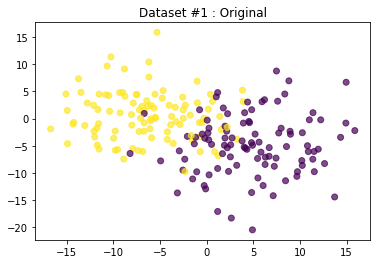

In [2]:
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)   #표본크기200, 가로세로변수2개
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )  #레이블로 컬러링해 시각화
plt.title('Dataset #1 : Original')
plt.show()

#### 데이터셋 2

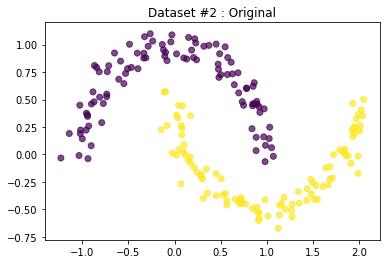

In [3]:
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

### 1.2. Apply clustering and visualize: 2개의 데이터셋을  군집화

### 1) k-means

#### 데이터셋 1을 2개로 군집화

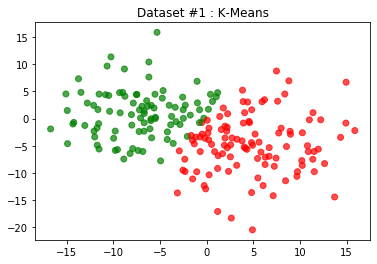

In [4]:
kmeans = KMeans(n_clusters=2,random_state=123)                 
kmeans.fit(X1)                                                     
myColors = {0:'red',1:'green'}                                 
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )    
plt.title('Dataset #1 : K-Means')
plt.show()

#선으로 자른듯한 경계선이 생김

#### 데이터셋 2를 2개로 군집화

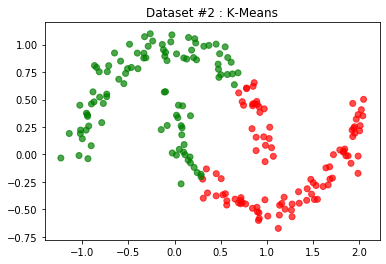

In [5]:
kmeans = KMeans(n_clusters=2,random_state=123)                
kmeans.fit(X2)                                                  
myColors = {0:'red',1:'green'}                                 
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()

#선으로 잘랐는데 만족스러운 결과는 아님

### 2. 병합 군집화 (Apply agglomerative)

#### 데이터셋 1을 2개로 군집화

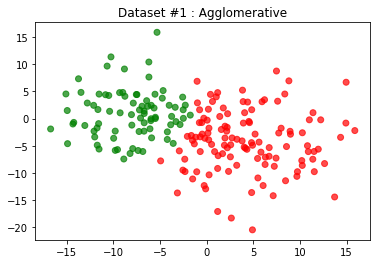

In [6]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red',1:'green'}                                
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

#선으로 자른듯함, 불만족

#### 데이터셋 2를 2개로 군집화

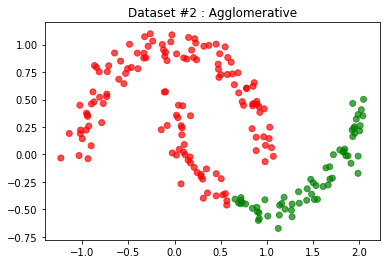

In [7]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red',1:'green'}                                 
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

### 3. 계층적 군집화 (Apply hierarchical) 


- 가까운 아이템들끼리 뭉쳐서 군집을 키워나가는 방식



#### 데이터셋 1을 덴드로그램으로 시각화

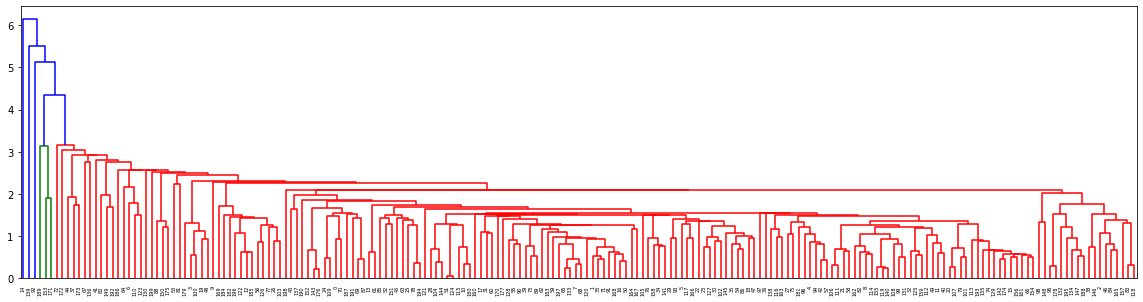

In [8]:
myLinkage = linkage(X1,method='single')  #linkage객체에 single적용한 덴드로그램 함수 넣음 (single linkage사용해 군집화)
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

#거의 빨간색 하나로 모든것이 병합되고 자잘한 몇개의 녹색 군집

#### 시각화한 것을 군집화

In [9]:
labels = fcluster(myLinkage, 5, criterion='distance')  #높이(거리)를 5로 자름
pd.Series(labels).value_counts()

#197개가 1그룹으로 하나로 뭉쳐져 의미 없음

1    197
4      1
3      1
2      1
dtype: int64

#### 데이터셋 2를 덴드로그램으로 시각화

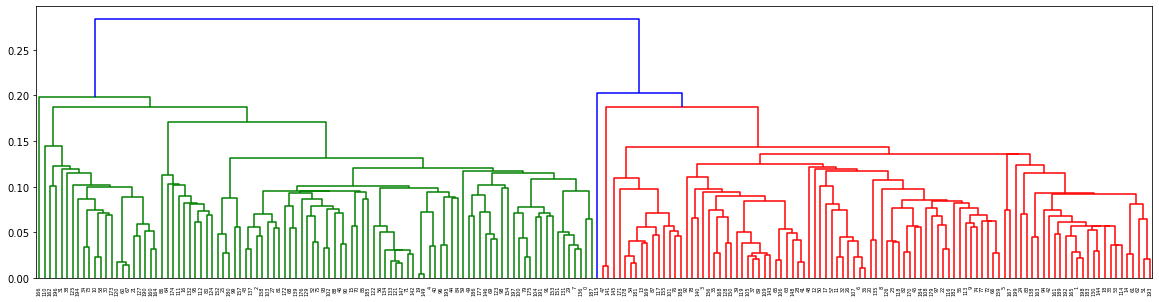

In [10]:
myLinkage = linkage(X2,method='single')       # single linkage사용해 군집화
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

#높이가 두 군집 사이의 거리임

#### 시각화한 것을 군집화

In [11]:
labels = fcluster(myLinkage, 0.23, criterion='distance')   #높이(거리)를 0.23으로 자름
pd.Series(labels).value_counts()

#0.23 수치면 거리, 정수면 개수
#0.23이라는 높이점으로 자르면 2개 군집 만들어짐
#높이가 두 군집 사이의 거리임

2    100
1    100
dtype: int64

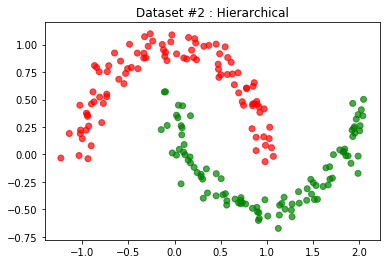

In [12]:
#위의 결과 컬러링
myColors = {1:'red',2:'green'}     
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

### 4. DBSCAN

- 좌표점의 밀도에 따라 군집화




#### 데이터셋 1

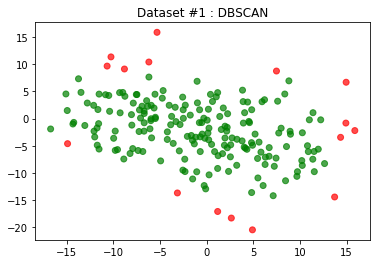

In [13]:
dbscan = DBSCAN(eps=3, min_samples=5)  
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'}        
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

#레드는 -1 , 녹색은 0, 파랑은 1로 설정해서 3개 군집 나와야하는데 두개의 군집 뿐임
#레드는 아웃라이어(좋지않은 상태)

#중간은 하나로 뭉치고(녹색), 외상치만 남은(빨강)

#이 경우 DBSCAN말고 Kmeans나 계층적군집을 써야 함
#밀도가 연결되어 있음(큰덩어리1개, 아웃라이어 여러개)


#### 데이터셋 2

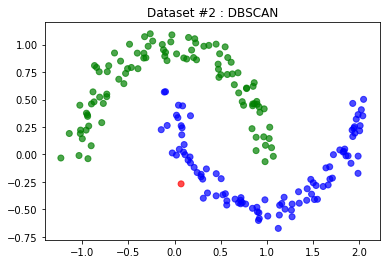

In [14]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}        
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()

#한개만 빨간색점 군집화안됨(아웃라이어)
#녹색과 파랑은 군집화 잘됨

#병합군집화는 제대로 안되고 계층적은 무난한게 됨

#이 경우 Kmeans 의미 없음

#### 어떤 경우에 어떤 군집화 알고리즘을 써야할지가 중요하다